In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from scipy.stats import chi2_contingency
from scipy.stats import chisquare
import scipy.stats as ss

import seaborn as sns

import math

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../input/mercedes-benz-greener-manufacturing/train.csv.zip')
print(df)
print(df.dtypes)

# select the float columns
df_float = df.select_dtypes(include=[np.float])
print(df_float.columns)
# select int columns
df_int = df.select_dtypes(include=[np.int])
print(df_int.columns)
# select object columns
df_int = df.select_dtypes(include=[object])
print(df_int.columns)

        ID       y  X0 X1  X2 X3 X4  X5 X6 X8  ...  X375  X376  X377  X378  \
0        0  130.81   k  v  at  a  d   u  j  o  ...     0     0     1     0   
1        6   88.53   k  t  av  e  d   y  l  o  ...     1     0     0     0   
2        7   76.26  az  w   n  c  d   x  j  x  ...     0     0     0     0   
3        9   80.62  az  t   n  f  d   x  l  e  ...     0     0     0     0   
4       13   78.02  az  v   n  f  d   h  d  n  ...     0     0     0     0   
...    ...     ...  .. ..  .. .. ..  .. .. ..  ...   ...   ...   ...   ...   
4204  8405  107.39  ak  s  as  c  d  aa  d  q  ...     1     0     0     0   
4205  8406  108.77   j  o   t  d  d  aa  h  h  ...     0     1     0     0   
4206  8412  109.22  ak  v   r  a  d  aa  g  e  ...     0     0     1     0   
4207  8415   87.48  al  r   e  f  d  aa  l  u  ...     0     0     0     0   
4208  8417  110.85   z  r  ae  c  d  aa  g  w  ...     1     0     0     0   

      X379  X380  X382  X383  X384  X385  
0        0     0    

-  Check for inconsistencies in the data
 - 1) Check for Duplicates rows
 - 2) Check for missing data
 - 3) Check for outliers in 'y'
 - 4) Check for categorical columns with low variance
 - 5) Check for columns with duplicate values

In [3]:
df[df.duplicated(['ID'], keep=False)]

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385


In [4]:
df.isnull().sum().sum()

0

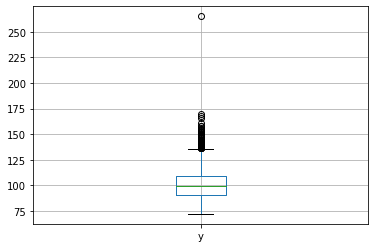

In [5]:
boxplot = df.boxplot(column=['y'])

In [6]:
# For numerical values
columnLowStd = []
for col in df.columns:
    
    if df[col].dtype=='int64':
        
        if df[col].std() < 0.1:
            columnLowStd.append(col)
            
print(columnLowStd)

['X11', 'X15', 'X16', 'X17', 'X18', 'X21', 'X24', 'X26', 'X30', 'X33', 'X34', 'X36', 'X39', 'X40', 'X42', 'X53', 'X55', 'X59', 'X60', 'X62', 'X65', 'X67', 'X74', 'X78', 'X83', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X97', 'X99', 'X102', 'X104', 'X105', 'X107', 'X110', 'X112', 'X122', 'X123', 'X124', 'X125', 'X145', 'X153', 'X160', 'X165', 'X167', 'X169', 'X172', 'X173', 'X183', 'X184', 'X190', 'X192', 'X199', 'X200', 'X204', 'X205', 'X207', 'X210', 'X212', 'X213', 'X214', 'X216', 'X217', 'X221', 'X227', 'X230', 'X233', 'X235', 'X236', 'X237', 'X239', 'X240', 'X242', 'X243', 'X245', 'X248', 'X249', 'X252', 'X253', 'X254', 'X257', 'X258', 'X259', 'X260', 'X262', 'X266', 'X267', 'X268', 'X269', 'X270', 'X271', 'X274', 'X277', 'X278', 'X280', 'X281', 'X282', 'X288', 'X289', 'X290', 'X292', 'X293', 'X295', 'X296', 'X297', 'X298', 'X299', 'X307', 'X308', 'X309', 'X310', 'X312', 'X317', 'X318', 'X319', 'X320', 'X323', 'X325', 'X330', 'X332', 'X335', 'X338', 'X33

In [7]:
# Check frequency of variables in categorical columns
df["X0"].describe()

count     4209
unique      47
top          z
freq       360
Name: X0, dtype: object

In [8]:
df["X1"].describe()

count     4209
unique      27
top         aa
freq       833
Name: X1, dtype: object

In [9]:
df["X2"].describe()

count     4209
unique      44
top         as
freq      1659
Name: X2, dtype: object

In [10]:
df["X3"].describe()

count     4209
unique       7
top          c
freq      1942
Name: X3, dtype: object

In [11]:
df["X4"].describe()

count     4209
unique       4
top          d
freq      4205
Name: X4, dtype: object

In [12]:
df["X5"].describe()

count     4209
unique      29
top          v
freq       231
Name: X5, dtype: object

In [13]:
df["X6"].describe()

count     4209
unique      12
top          g
freq      1042
Name: X6, dtype: object

In [14]:
df["X8"].describe()

count     4209
unique      25
top          j
freq       277
Name: X8, dtype: object

In [15]:
DuplicateColumns = []
    
for col1 in range(df.shape[1]):
       
     
    for col2 in range(col1 + 1, df.shape[1]):            
                  
        if df.iloc[:,col1].equals(df.iloc[:,col2]):
            
            DuplicateColumns.append(df.columns.values[col2])

print(DuplicateColumns)

['X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347', 'X382', 'X232', 'X279', 'X35', 'X37', 'X39', 'X37', 'X302', 'X113', 'X134', 'X147', 'X222', 'X102', 'X214', 'X239', 'X76', 'X324', 'X248', 'X253', 'X385', 'X172', 'X216', 'X213', 'X84', 'X244', 'X244', 'X122', 'X243', 'X320', 'X245', 'X94', 'X242', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347', 'X242', 'X214', 'X239', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347', 'X199', 'X134', 'X147', 'X222', 'X119', 'X243', 'X320', 'X227', 'X147', 'X222', 'X146', 'X222', 'X226', 'X326', 'X360', 'X216', 'X262', 'X266', 'X247', 'X239', 'X326', 'X254', 'X279', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347', 'X364', 'X365', 'X320', 'X253', 'X385', 'X385', 'X266', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347', 'X290', 'X293', 'X297', 'X330', 'X347', 'X293', 'X297', 'X330', 'X347', 'X297',

# Look for mathematical correlations between categorical values and also mixed columns
https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
- Look for categorical features correlated with each other (CramerV)
- Look for features correlated with ID (CorrelationRatio)
- Look for features correlated with y  (CorrelatioRatio)

In [16]:
data = df.copy()
data = data.drop(columns = ['ID'])
data = data.drop(columns = ["y"])

column_to_drop = DuplicateColumns + columnLowStd
data = data.drop(columns=column_to_drop)

data = data.applymap(str)

# Cramers V for categorical correlations
def cramers_v(x, y):
    x = np.array(x)
    y = np.array(y)
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


cramersv = pd.DataFrame(index=data.columns,columns=data.columns)
columns = data.columns

for i in range(0,len(columns)):
    for j in range(0,len(columns)):
        #print(data[columns[i]].tolist())
        u = cramers_v(data[columns[i]].tolist(),data[columns[j]].tolist())
        cramersv.loc[columns[i],columns[j]] = u
        
cramersv.fillna(value=np.nan,inplace=True)

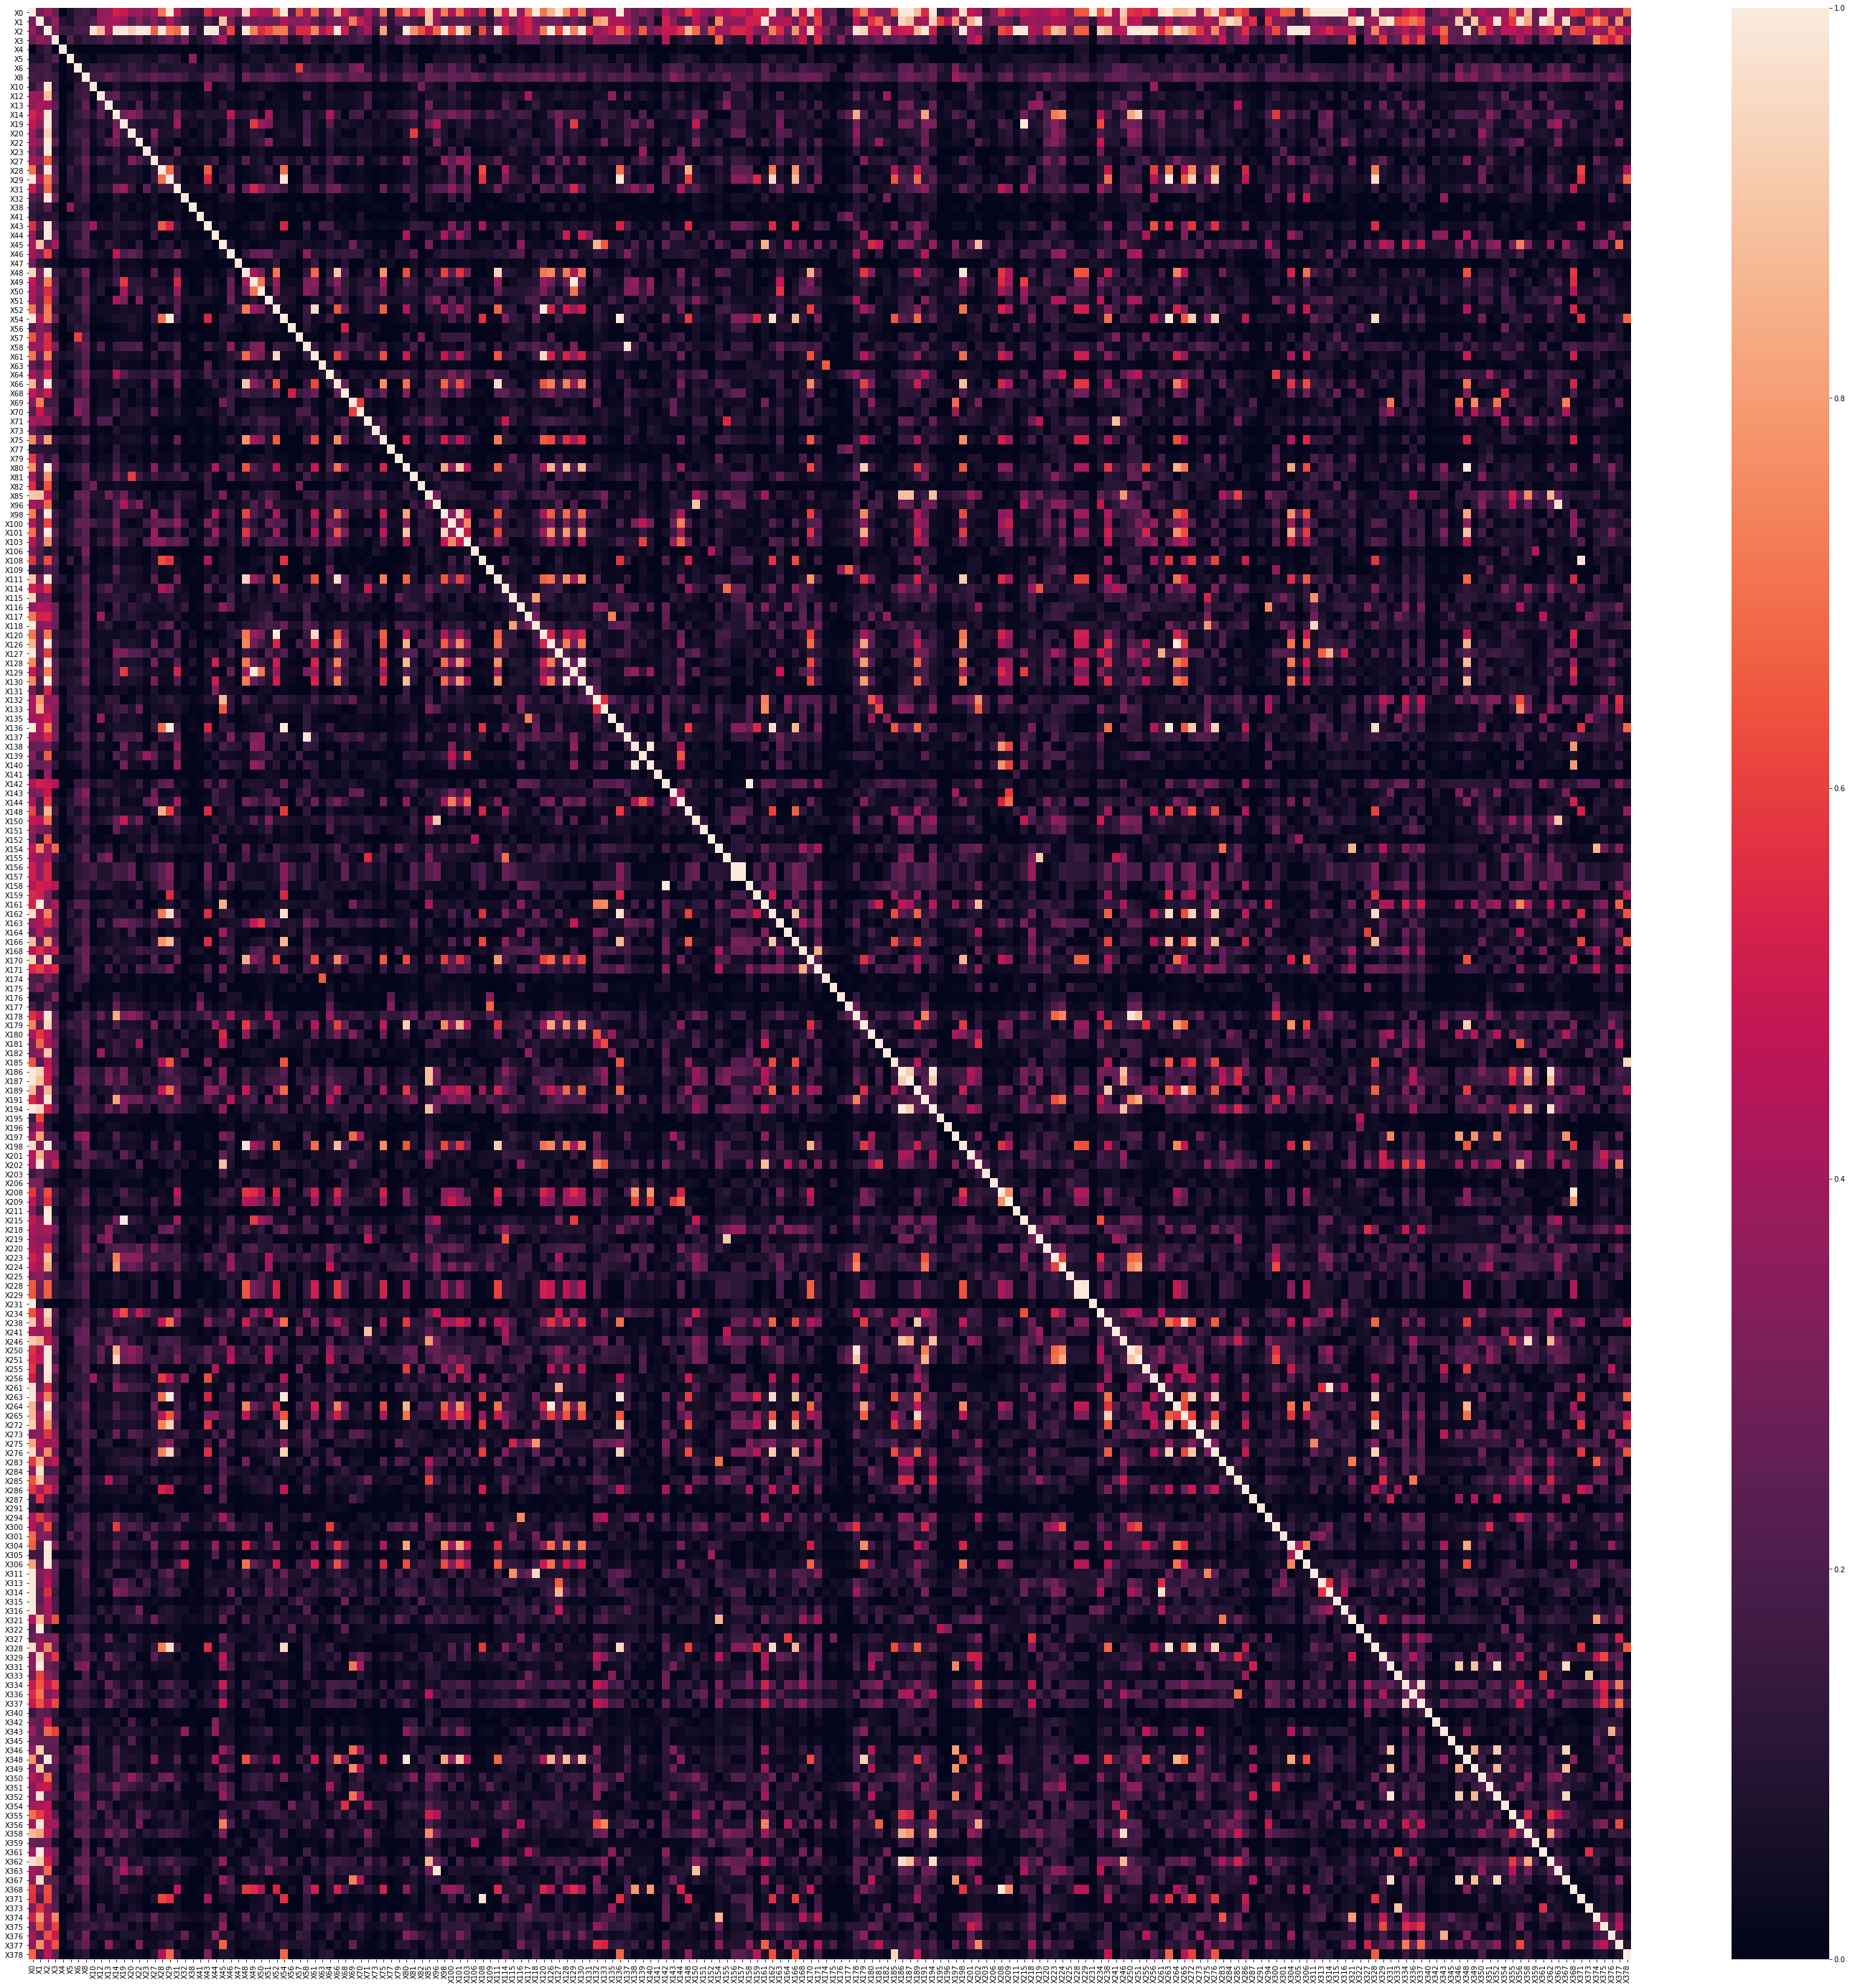

In [17]:
plt.figure(figsize=(50,50))
sns.heatmap(cramersv)
plt.show()

If we observe closely, cells X0,X1,X2 have a lot of correlations with the integer columns. Lets see individually

In [18]:
upper = cramersv.where(np.triu(np.ones(cramersv.shape),k=1).astype(np.bool))

print("X0",cramersv[cramersv['X0']>0.95]['X0'])
print("X1",cramersv[cramersv['X1']>0.95]['X1'])
print("X2",cramersv[cramersv['X2']>0.95]['X2'])
print("X3",cramersv[cramersv['X3']>0.9]['X3'])
print("X4",cramersv[cramersv['X4']>0.9]['X4'])
print("X5",cramersv[cramersv['X5']>0.9]['X5'])
print("X6",cramersv[cramersv['X6']>0.9]['X6'])
print("X8",cramersv[cramersv['X8']>0.9]['X8'])



X0 X0      1.000000
X29     0.994637
X54     0.994637
X118    0.994637
X127    0.993333
X136    0.994637
X162    0.964084
X186    0.994637
X187    0.994637
X194    0.994637
X198    0.959396
X231    0.994637
X261    0.972617
X263    0.994637
X276    0.955000
X311    0.989183
X313    0.994637
X314    0.994637
X315    0.994637
X316    0.994637
X328    0.963023
X362    0.969330
Name: X0, dtype: float64
X1 X1      1.000000
X161    0.992730
X202    0.986890
X284    0.964080
X322    0.997024
X331    0.997024
X352    0.978946
X356    0.973922
X361    0.997024
X367    0.955846
Name: X1, dtype: float64
X2 X2      1.000000
X10     0.978115
X14     0.979771
X19     0.989993
X22     0.993495
X23     0.994996
X28     0.994996
X32     0.994996
X43     0.994996
X44     0.994996
X48     0.994996
X66     0.994996
X80     0.994996
X98     0.994996
X101    0.994996
X111    0.994996
X126    0.994996
X128    0.994996
X130    0.994996
X178    0.984942
X191    0.982827
X198    0.994996
X211    0.994996
X215  

It can be assumed that the binary features are just encodings of categorical columns or the features are just strongly correlated or dependant on each other. In the notebook "My frustrated approach"(https://www.kaggle.com/robertoruiz/my-frustrated-approach) by Cro - Magnon where the suggestion was variables X0 to X8 are processes or configurations and the integer binary columns are car models. It could be that variables X0 and X8 are custom features of the cars and the remaining binary columns show whether the car has the feature or not. So we can deduce our results in two ways -:
- 1) Which car takes the most inspection time (Binary column) or
- 2) Which sub feature in a feature columns takes the most time(Categorical columns)


In [19]:
# Lets check for ID
data = df.copy()
data = data.drop(columns = ["y"])

# From low Std and equal column values
data = data.drop(columns=column_to_drop)
data = data.applymap(str)

column_to_drop = DuplicateColumns + columnLowStd

data['ID'] = data['ID'].astype(int)


# For correlation between categorical and numerical values
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    #print(fcat)
    #print(type(fcat[0]))
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    measurements = np.array(measurements)
    
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        #print(cat_measures)
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
        
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

corrRatio = pd.DataFrame(index=['ID'],columns=data.columns)
columns = data.columns

for j in range(0,len(columns)):
    #print(df[columns[j]].tolist())
    u = correlation_ratio(data[columns[j]].tolist(),data['ID'].tolist())
    corrRatio.loc[:,columns[j]] = u
    
corrRatio.fillna(value=np.nan,inplace=True)

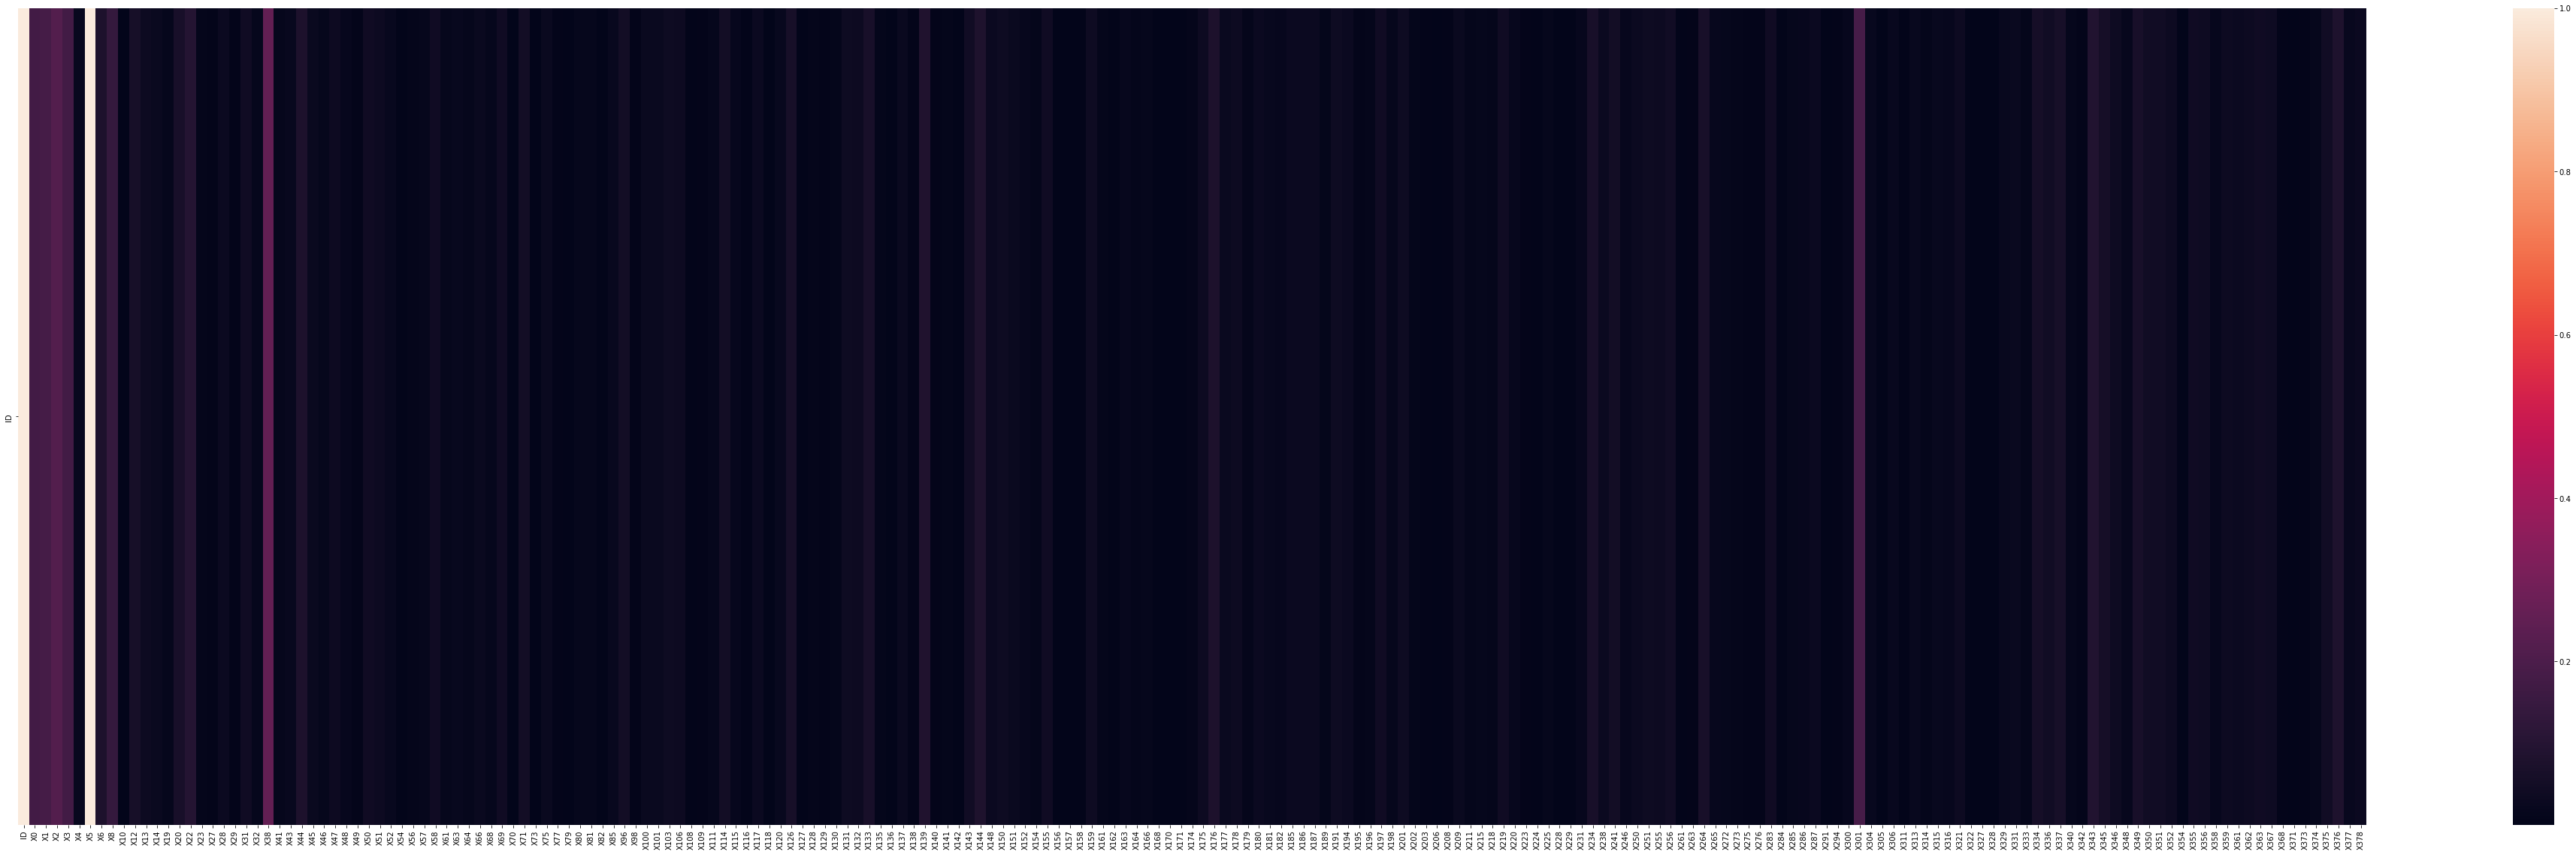

In [20]:
plt.figure(figsize=(70,20))
sns.heatmap(corrRatio)
plt.show()

- Strong correlation with ID and X5. Lets check with boxplot

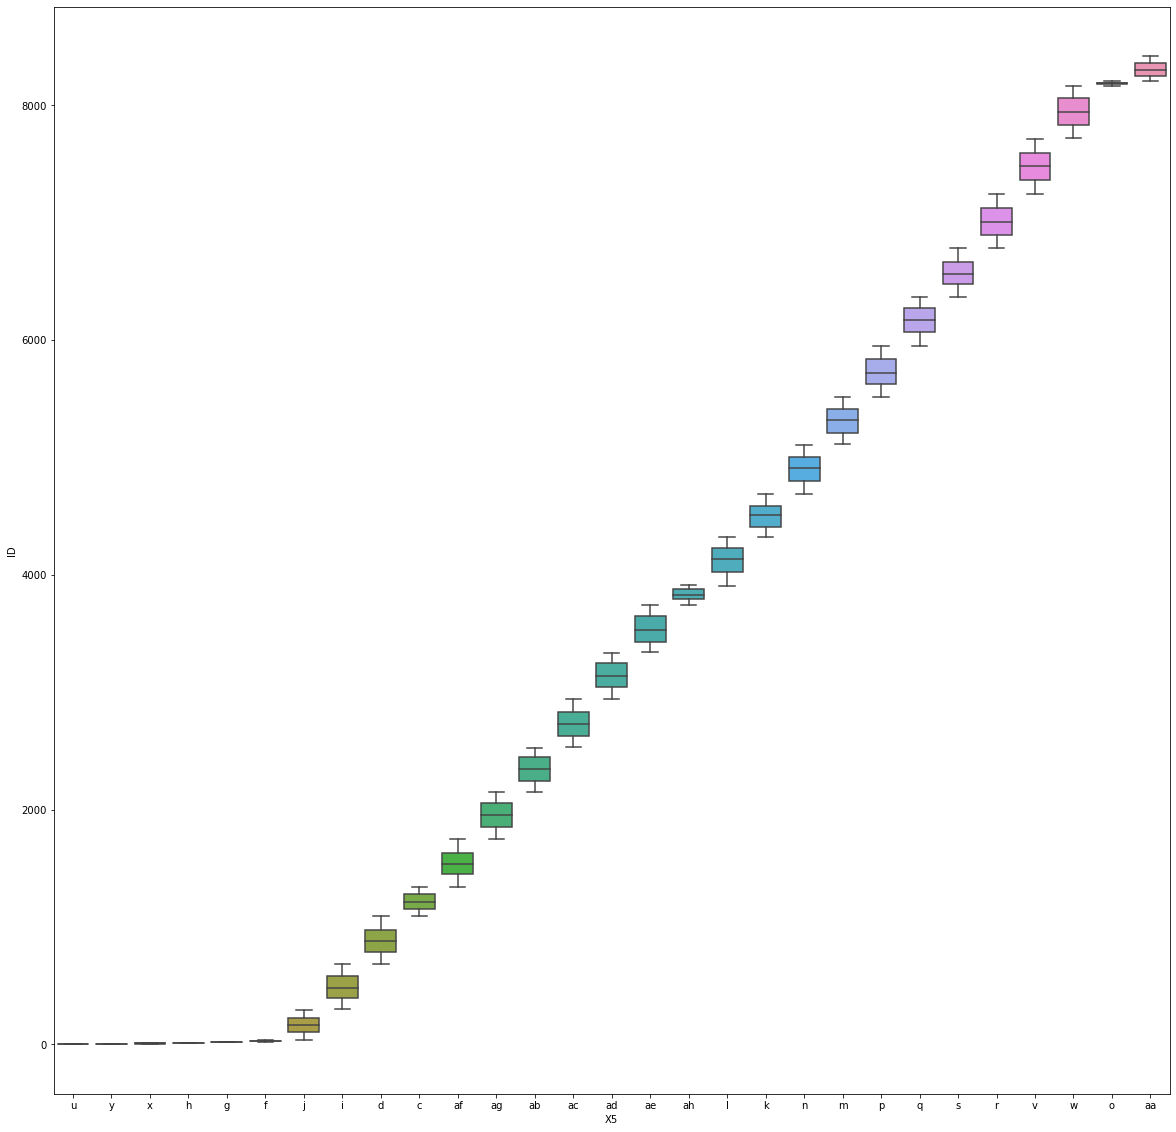

In [21]:
plt.figure(figsize=(20,20))
boxplot = sns.boxplot(x="X5",y='ID',data=df)
plt.show()

- It could mean the testing for feature X5 in an ordered fashion. Now let's check for y

In [22]:
data = df.drop(columns=['ID'])

# From low Std and equal column values
data = data.drop(columns=column_to_drop)

data = data.applymap(str)
data['y'] = data['y'].astype(float)

# For correlation between categorical and numerical values
def correlation_ratio(categories, measurements):
    
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    measurements = np.array(measurements)
    
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
        
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

corrRatio = pd.DataFrame(index=['y'],columns=data.columns)
columns = data.columns

for j in range(0,len(columns)):
    u = correlation_ratio(data[columns[j]].tolist(),data['y'].tolist())
    corrRatio.loc[:,columns[j]] = u
    
corrRatio.fillna(value=np.nan,inplace=True)



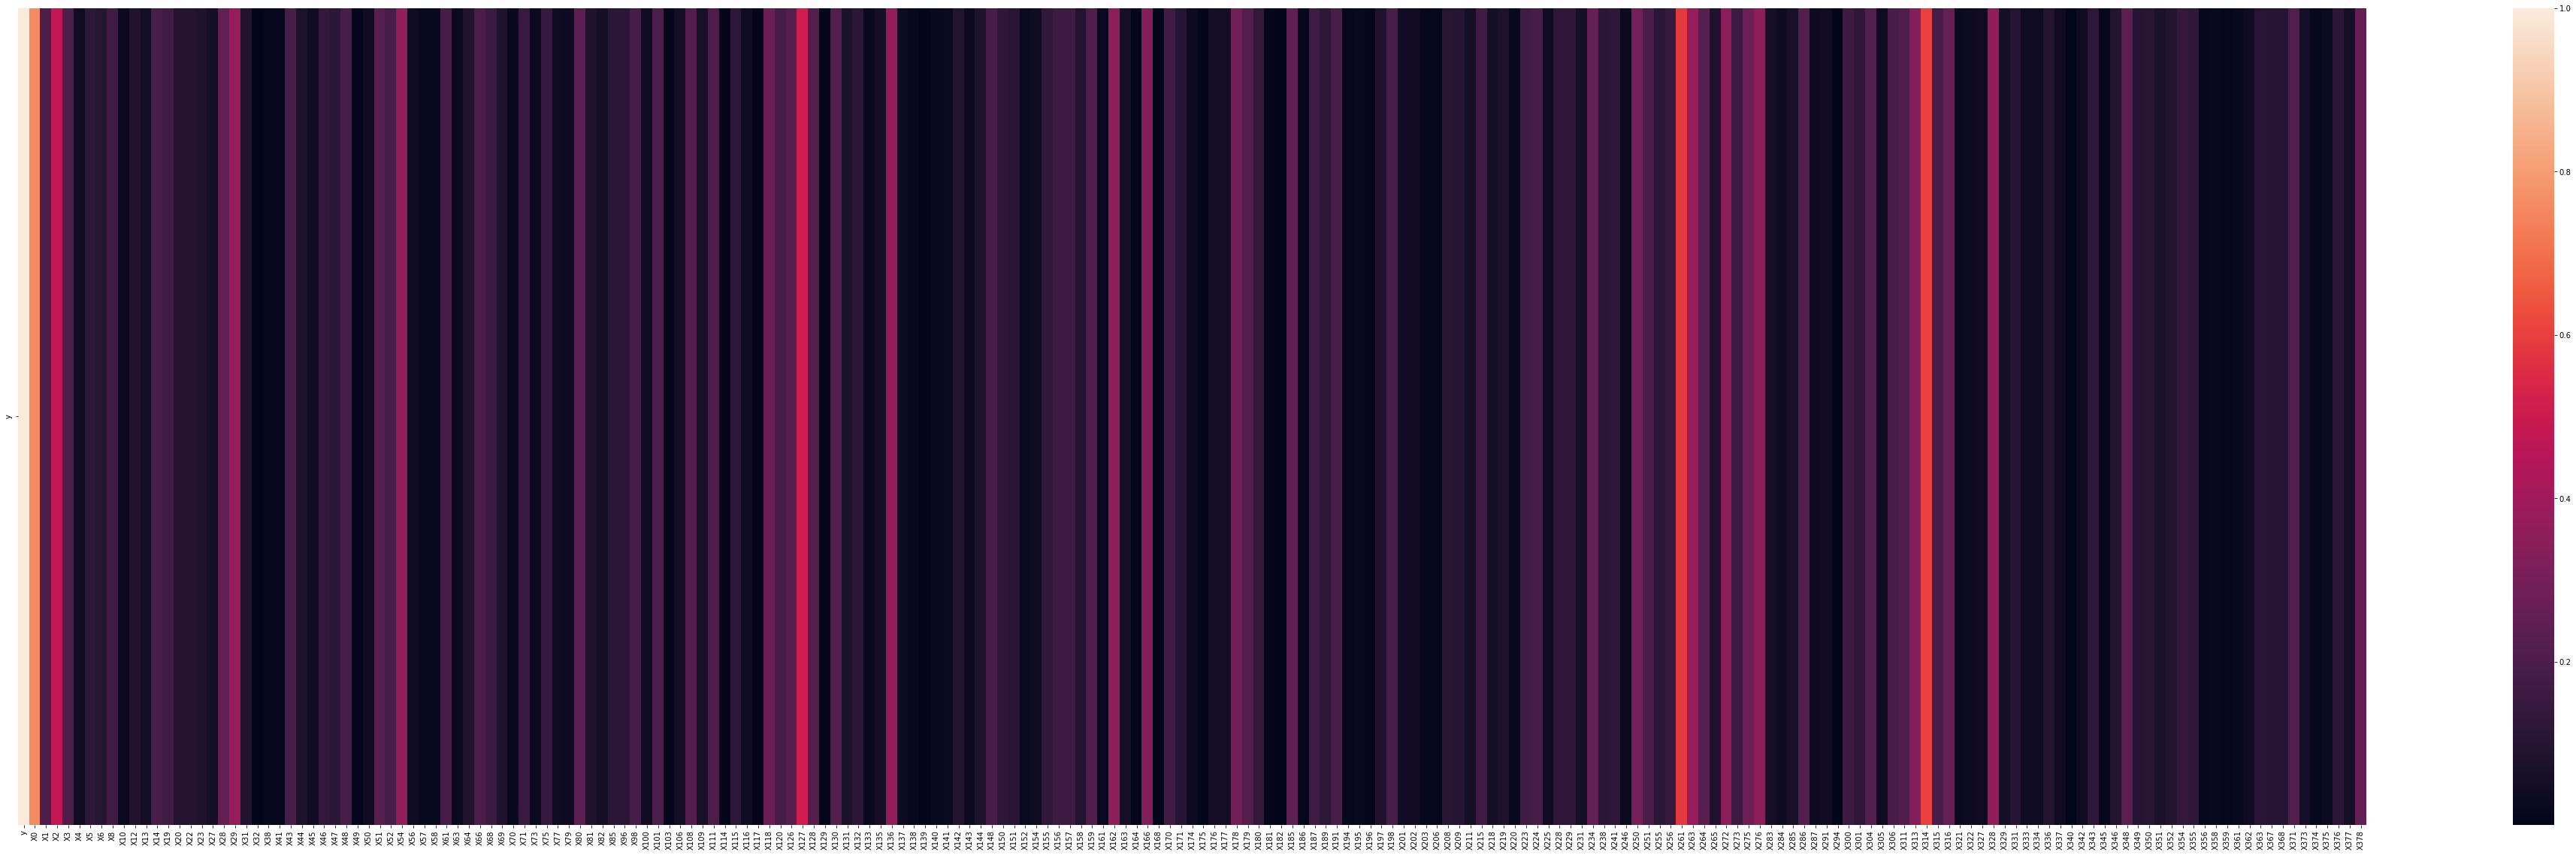

In [23]:
plt.figure(figsize=(70,20))
sns.heatmap(corrRatio)
plt.show()

In [24]:
upper = corrRatio.where(np.triu(np.ones(corrRatio.shape),k=1).astype(np.bool))
# Find index of feature columns with correlation smaller than 0.1
index_with_low_coor = [column for column in upper.columns if any(upper[column] < 0.1)]
print(index_with_low_coor)

['X4', 'X10', 'X12', 'X13', 'X20', 'X22', 'X23', 'X27', 'X31', 'X32', 'X38', 'X41', 'X44', 'X45', 'X49', 'X50', 'X56', 'X57', 'X58', 'X63', 'X64', 'X69', 'X70', 'X73', 'X77', 'X79', 'X81', 'X82', 'X100', 'X103', 'X106', 'X109', 'X114', 'X116', 'X117', 'X129', 'X131', 'X133', 'X135', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X152', 'X154', 'X158', 'X161', 'X163', 'X164', 'X168', 'X174', 'X175', 'X176', 'X177', 'X181', 'X182', 'X186', 'X194', 'X195', 'X196', 'X197', 'X201', 'X202', 'X203', 'X206', 'X211', 'X218', 'X219', 'X220', 'X225', 'X231', 'X246', 'X265', 'X283', 'X284', 'X285', 'X287', 'X291', 'X294', 'X305', 'X321', 'X322', 'X327', 'X329', 'X333', 'X334', 'X336', 'X337', 'X340', 'X342', 'X345', 'X346', 'X349', 'X351', 'X352', 'X356', 'X358', 'X359', 'X361', 'X362', 'X373', 'X374', 'X375', 'X377']


In [25]:
# Between numerical values ID and y
print(df['ID'].corr(df['y']))

-0.05510771649831255


- Among the categorical variables,we can see from the above a high correlation with X0 and its dependant features. This shows a strong correlation between X0 and its dependant features. Hence, we can assume that the dependant features would be enough to show impact of X0
- Now lets implement the features in a Random Forest Regressor


In [26]:
# Lets first train and test within the training set

# Dropping X4 and X3 due to low frequency of values
# X2('aj') and X5('t') contain variables in the test set which are not present in the training set. X5 is highly correlated with the ID
# which can be a suitable way to represent it in the model.Similar problem with X0('av')

columns_to_drop = columnLowStd + DuplicateColumns + ['X4','X2','X5','X0','X3'] + index_with_low_coor

data = df.copy()

# Remove only the extreme outlier
data = data[data['y']<250]

data = data.drop(columns=columns_to_drop)

X = data
X = X.drop(columns='y')

y = data['y']
y = y.values
y = y.reshape((len(y), 1))

# split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=32)

columns  = X_train.columns

# Label encoding values
for c in columns:
    if X_train[c].dtype == 'object':
        le = LabelEncoder() 
        X_train[c] = le.fit_transform(X_train[c])
        X_test[c] = le.transform(X_test[c])
        
param_grid={
        'n_estimators': range(200,500,100), 
        'min_samples_leaf': range(10,20,10), 
        'min_samples_split': range(10,20,10),  
        'max_depth': range(40,60,10)       
    }
cv = KFold(n_splits=5, shuffle=True, random_state=40)
gridSearch = GridSearchCV(estimator=RandomForestRegressor(), scoring='r2',cv=cv,param_grid=param_grid)
result = gridSearch.fit(X_train, y_train)
print("Best Score " + str(result.best_score_)+" with paramter "+ str(result.best_params_))


Best Score 0.5768619394936898 with paramter {'max_depth': 50, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 300}


In [27]:
# Taking values as per grid score
model = RandomForestRegressor(n_estimators=result.best_params_['n_estimators'],
                              min_samples_split=result.best_params_['min_samples_split'],
                              min_samples_leaf=result.best_params_['min_samples_leaf'], 
                              max_depth=result.best_params_['max_depth'])

model.fit(X_train, y_train)

pred = model.predict(X_test)
print('r2_score:',r2_score(pred,y_test))



r2_score: 0.46203760870527044


['X162', 'X328', 'X130', 'X261', 'X166', 'X276', 'X75', 'X255', 'X238', 'X371', 'X28', 'X108', 'X128', 'X159', 'X126', 'X378', 'X80', 'X185', 'X148', 'X348', 'X264', 'X272', 'X170', 'X228', 'X66', 'X198', 'X229', 'X179', 'X256', 'X208', 'X111', 'X98', 'X343', 'X101', 'X367', 'X331', 'X286', 'X120', 'X52', 'X251', 'X376', 'X304', 'X306', 'X68', 'X301', 'X215', 'X209', 'X250', 'X43', 'X96', 'X48', 'X178', 'X363', 'X19', 'X61', 'X155', 'X368', 'X300', 'X234', 'X157', 'X150', 'X151', 'X14', 'X316', 'X156', 'X224', 'X85', 'X115', 'X180', 'X313', 'X241', 'X187', 'X311', 'X275', 'X71', 'X191', 'X354', 'X51', 'X273', 'X171', 'X223', 'X355', 'X132', 'X46', 'X350', 'X47', 'X127', 'X1', 'X6', 'X54']


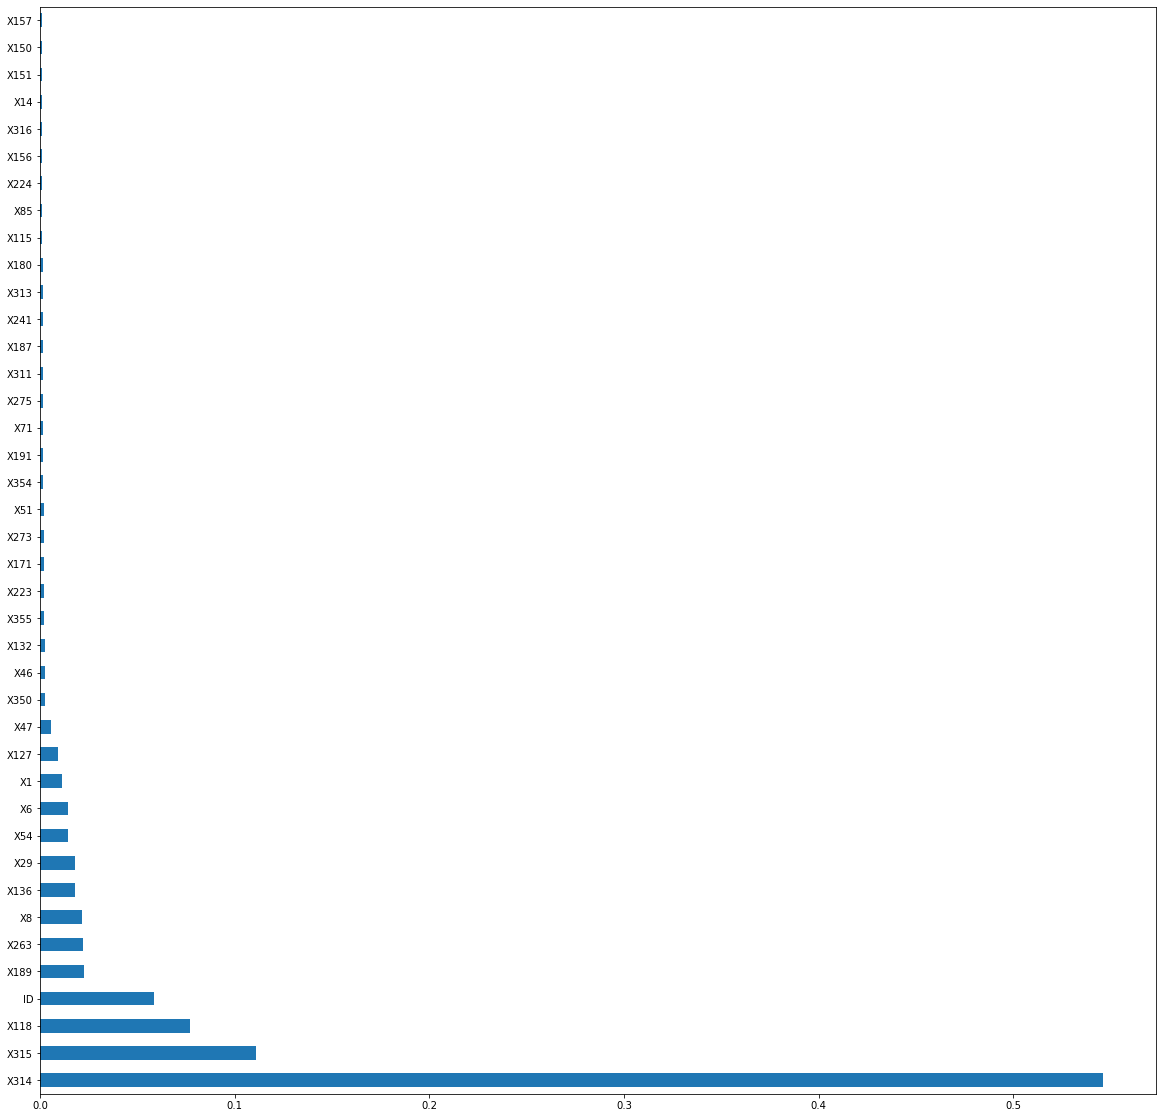

In [28]:
plt.figure(figsize=(20,20))
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(40).plot(kind='barh')
print(feat_importances.nsmallest(90).index.to_list())

Low_importance_columns = feat_importances.nsmallest(90).index.to_list()

# Remove columns with least importance and train again


Eliminate columns with low feature importance to check if score improves

In [29]:
columns_to_drop = columnLowStd + DuplicateColumns + ['X4','X2','X5','X0','X3'] + index_with_low_coor+ Low_importance_columns

data = df.copy()

# Remove only the extreme outlier
data = data[data['y']<250]

data = data.drop(columns=columns_to_drop)

X = data
X = X.drop(columns='y')

y = data['y']
y = y.values
y = y.reshape((len(y), 1))

# split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=32)

columns  = X_train.columns

# Label encoding values
for c in columns:
    if X_train[c].dtype == 'object':
        le = LabelEncoder() 
        X_train[c] = le.fit_transform(X_train[c])
        X_test[c] = le.transform(X_test[c])
        
param_grid={
        'n_estimators': range(200,500,100), 
        'min_samples_leaf': range(10,20,10), 
        'min_samples_split': range(10,20,10),  
        'max_depth': range(40,60,10)       
    }
cv = KFold(n_splits=5, shuffle=True, random_state=40)
gridSearch = GridSearchCV(estimator=RandomForestRegressor(), scoring='r2',cv=cv,param_grid=param_grid)
result = gridSearch.fit(X_train, y_train)
print("Best Score " + str(result.best_score_)+" with paramter "+ str(result.best_params_))

Best Score 0.5746533843522716 with paramter {'max_depth': 50, 'min_samples_leaf': 10, 'min_samples_split': 10, 'n_estimators': 300}


In [30]:
# Taking values as per grid score
model = RandomForestRegressor(n_estimators=result.best_params_['n_estimators'],
                              min_samples_split=result.best_params_['min_samples_split'],
                              min_samples_leaf=result.best_params_['min_samples_leaf'], 
                              max_depth=result.best_params_['max_depth'])

model.fit(X_train, y_train)

pred = model.predict(X_test)
print('r2_score:',r2_score(pred,y_test))

r2_score: 0.4662122101719476


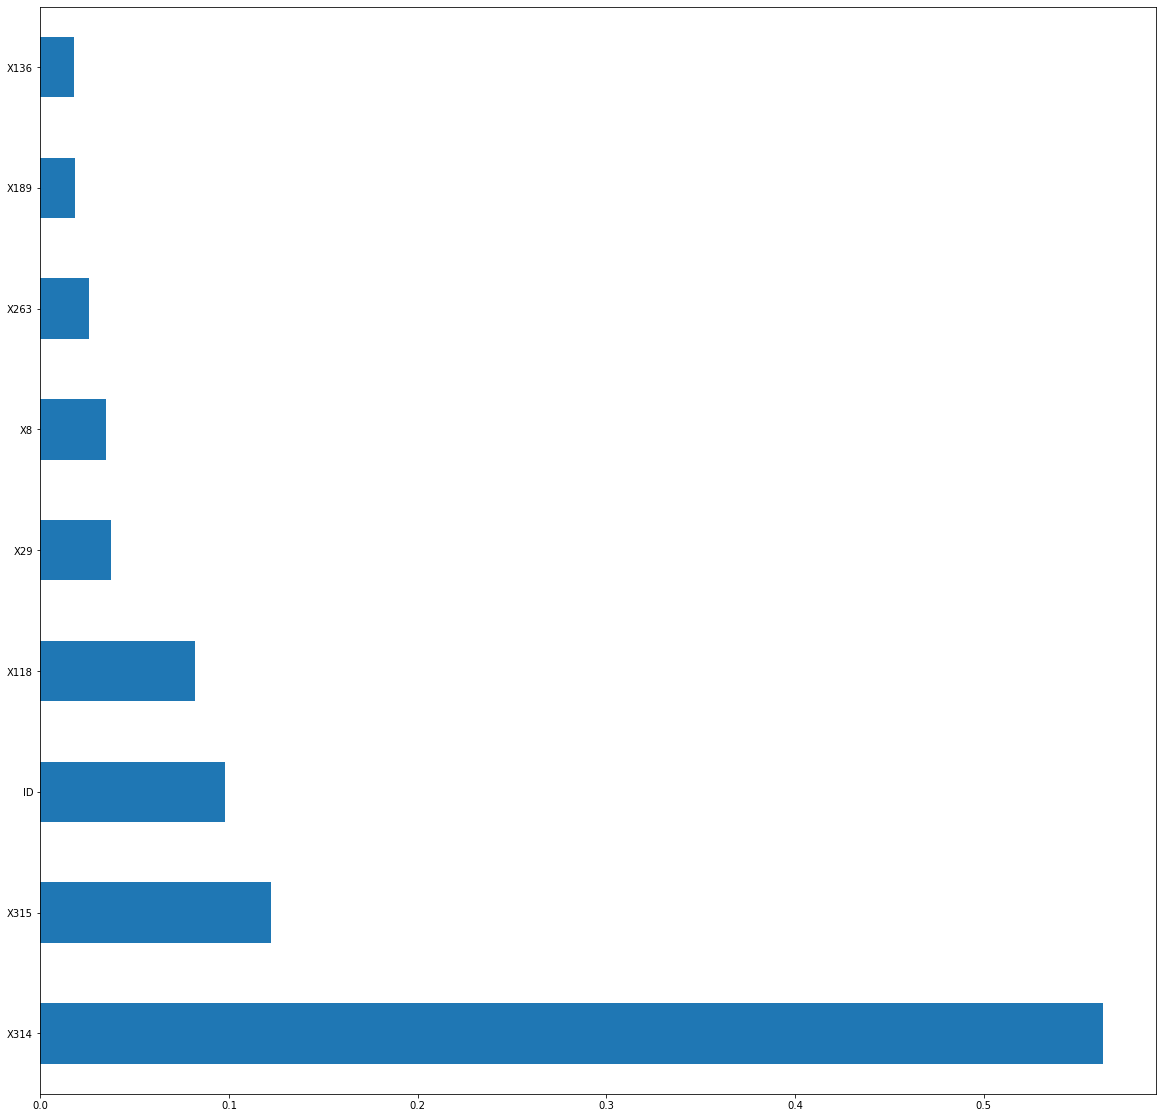

In [31]:
plt.figure(figsize=(20,20))
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(40).plot(kind='barh')


- A high r2 score score during grid search did not correspond to a similar value in the test set. Lets plot the training curve and check for overfitting
- https://www.dataquest.io/blog/learning-curves-machine-learning/

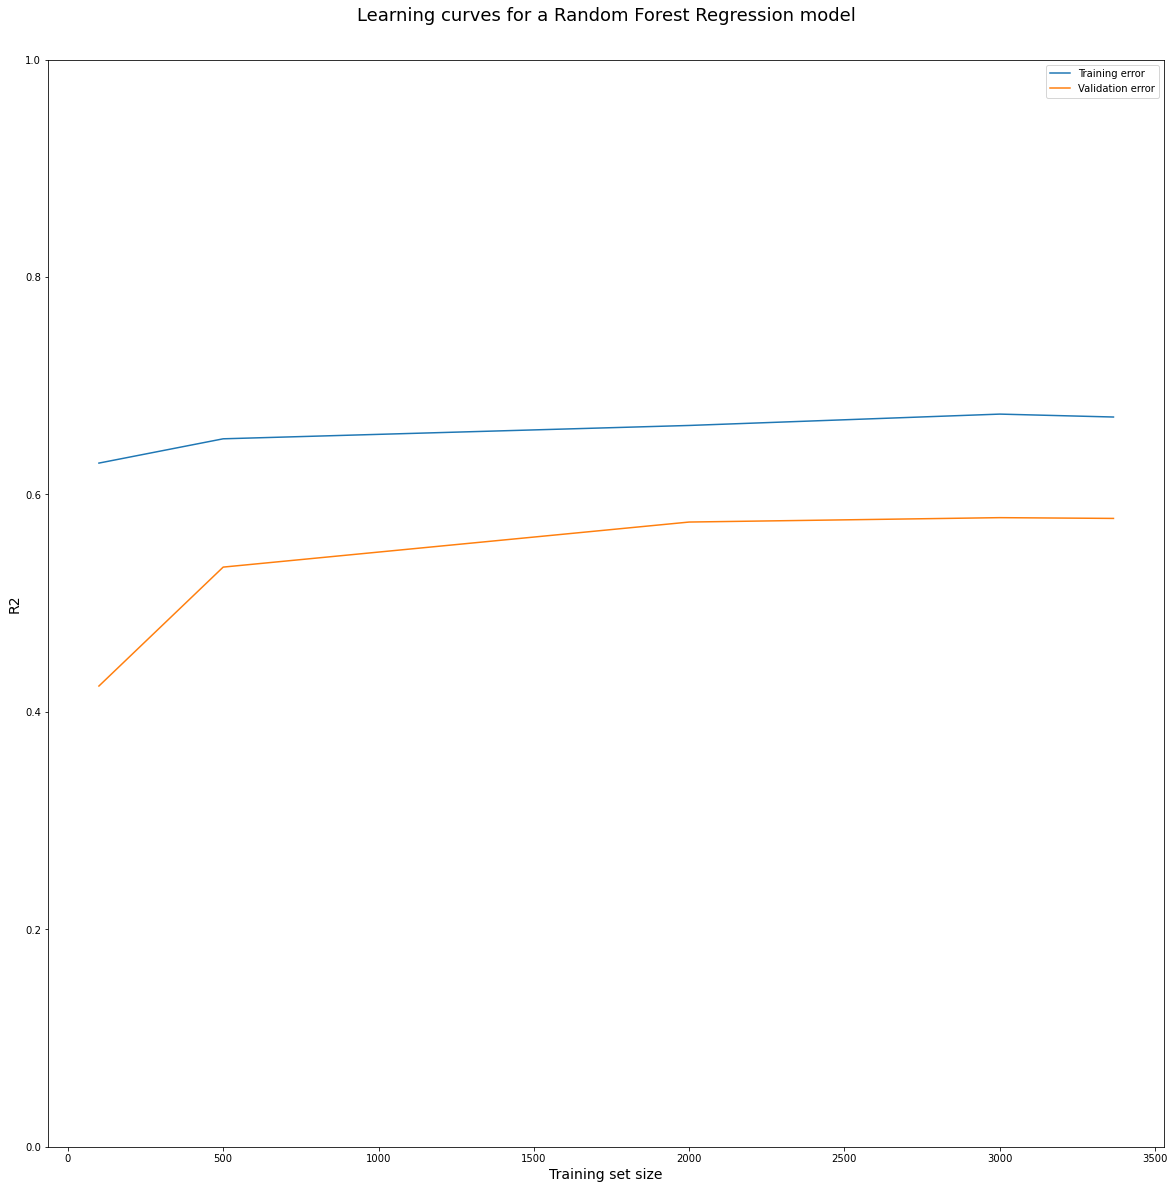

In [32]:
data = df.sample(frac =1,random_state=32)

columns_to_drop = columnLowStd + DuplicateColumns + ['X4','X2','X5','X0','X3'] + index_with_low_coor+ Low_importance_columns

# Remove only the extreme outlier
data = data[data['y']<250]

data = data.drop(columns=columns_to_drop)

X = data
X = X.drop(columns='y')

y = data['y']
y = y.values
y = y.reshape((len(y), 1))

X_train = X
y_train = y

# Label Encoding values
columns = X_train.columns
for c in columns:
        
    if X_train[c].dtype == 'object':
        le = LabelEncoder() 
        X_train[c] = le.fit_transform(X_train[c])
       
train_sizes = [100, 500, 2000, 3000, 3366]

train_sizes, train_scores, validation_scores = learning_curve(
estimator = RandomForestRegressor(n_estimators=result.best_params_['n_estimators'],
                              min_samples_split=result.best_params_['min_samples_split'],
                              min_samples_leaf=result.best_params_['min_samples_leaf'], 
                              max_depth=result.best_params_['max_depth']),
X = X_train,y = y_train, train_sizes = train_sizes, cv = 5)

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis =1)

plt.figure(figsize=(20,20))
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('R2', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a Random Forest Regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,1)
plt.show()

Above graph shows that the validation error decreases with increasing training size. The mean of the validation error seems to be close to 0.5 but decreases with increasing sample size. It could be due to the freqency of the categorical variables or any eliminations of columns done above. Let's try on the test set.

In [33]:
columns_to_drop = columnLowStd + DuplicateColumns + ['X4','X2','X5','X0','X3'] + index_with_low_coor+ Low_importance_columns

data = df.copy()

# Remove only the extreme outlier
data = data[data['y']<250]

data = data.drop(columns=columns_to_drop)

X = data
X = X.drop(columns='y')

y = data['y']
y = y.values
y = y.reshape((len(y), 1))

X_train = X
y_train = y

df_test = pd.read_csv('../input/mercedes-benz-greener-manufacturing/test.csv.zip')
data = df_test.copy()
data = data.drop(columns=columns_to_drop)

X_test = data

columns  = X_train.columns

for c in columns:
    if X_train[c].dtype == 'object':
        le = LabelEncoder() 
        X_train[c] = le.fit_transform(X_train[c])
        X_test[c] = le.transform(X_test[c])
        

model = RandomForestRegressor(n_estimators=result.best_params_['n_estimators'],
                              min_samples_split=result.best_params_['min_samples_split'],
                              min_samples_leaf=result.best_params_['min_samples_leaf'], 
                              max_depth=result.best_params_['max_depth'])
model.fit(X_train, y_train)

pred = model.predict(X_test)



In [34]:
output = pd.DataFrame()

output['ID'] = X_test['ID']
output['y']  = pred

output.to_csv("submissionsRandomForest.csv",index=False)

- Lets look at boxplot of target variable, variable with highest importance and it's associated categorical variable

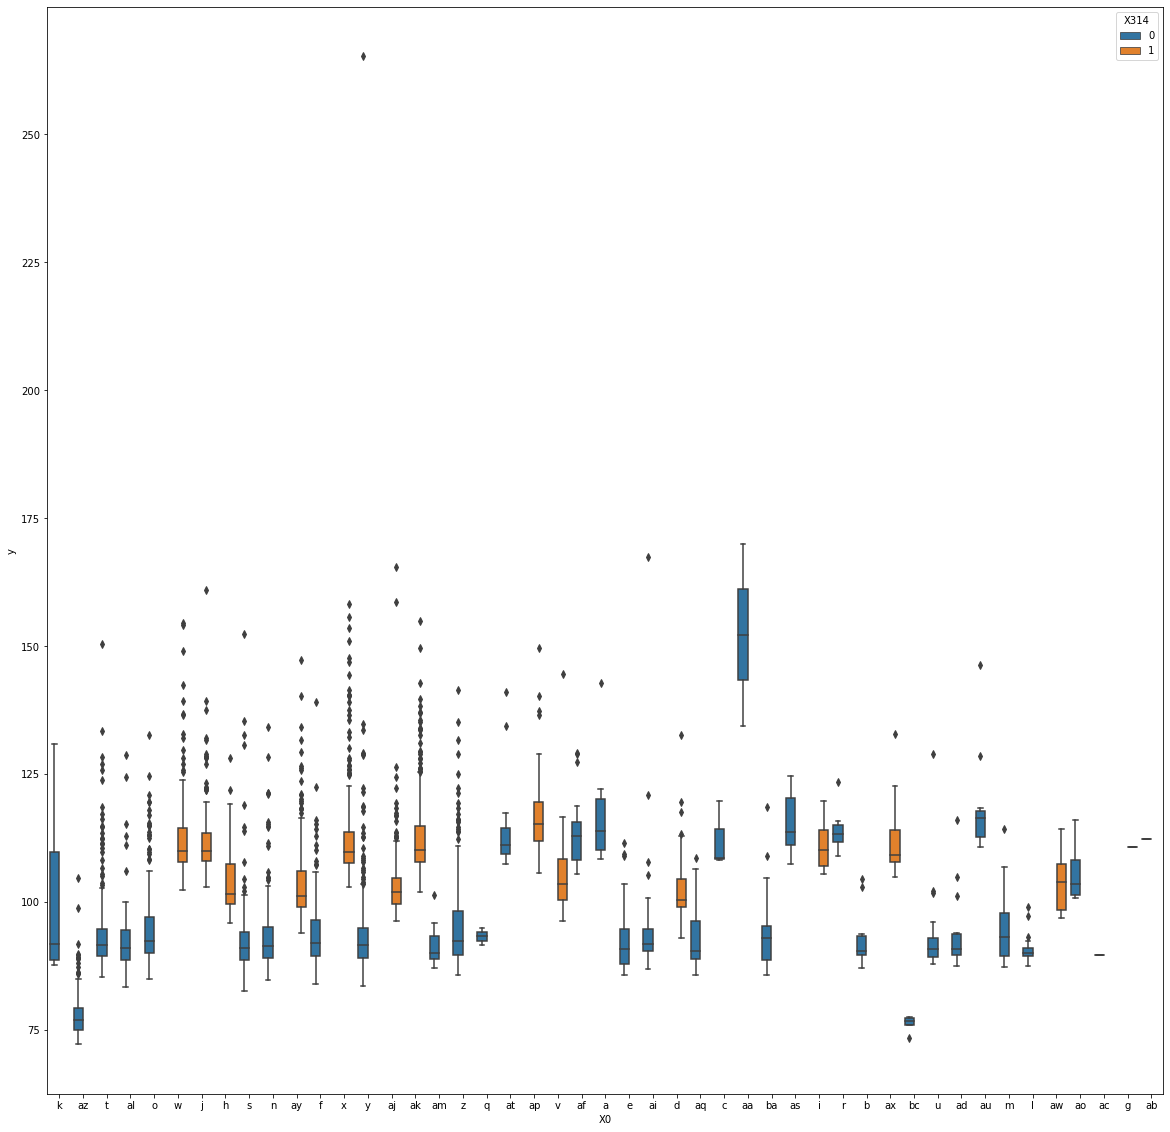

In [35]:
plt.figure(figsize=(20,20))
boxplot = sns.boxplot(x='X0',y='y',data=df,hue="X314")
plt.show()

Rather than finding out which feature is important, another way of looking at it is, which sub feature is important. So from feature importance, we know X314 is important but at the same time we know that X314 is highly correlated with X0. So we can deduce the following

- 1) Car or feature X314 plays a major role on time spent on test bench
- 2) Or car or feature not having subfeature y could play a major role on the time spent on the test bench

In [36]:
# Let me know if further improvement is needed. It's my first notebook in Kaggle. 
# I would like to receive suggestions if there is anything I missed or made a mistake